In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r"D:\Uber Data Analysis Project\ncr_ride_bookings.csv")
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [3]:
df.shape

(150000, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [5]:
# Calculating number of null values
null_count = df.isnull().sum()
print(null_count)

Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
dtype: int64


## Binary Flags
A binary flag is just a column that tells you yes/no (or True/False) about something.

In our case:

is_customer_cancelled → True if the customer cancelled the ride, otherwise False.

is_driver_cancelled → True if the driver cancelled the ride.

is_incomplete → True if the ride didn’t complete.

In [6]:
# Binary Flags
df['is_Customer_Cancelled'] = df['Cancelled Rides by Customer'].notna() & (df['Cancelled Rides by Customer']>0)
df['is_Driver_Cancelled'] = df['Cancelled Rides by Driver'].notna() & (df['Cancelled Rides by Driver']>0)
df['is_incomplete'] = df['Incomplete Rides'].notna() & (df['Incomplete Rides']>0)

In [7]:
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,is_Customer_Cancelled,is_Driver_Cancelled,is_incomplete
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI,False,False,True
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card,False,False,False
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,416.0,34.02,4.6,5.0,UPI,False,False,False
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,737.0,48.21,4.1,4.3,UPI,False,False,False


Filling Null Values

In [8]:
# Filling Numeric columns with median
df['Avg VTAT'].fillna(df['Avg VTAT'].median())
df['Avg CTAT'].fillna(df['Avg CTAT'].median())
df['Booking Value'].fillna(df['Booking Value'].median())
df['Ride Distance'].fillna(df['Ride Distance'].median())
df['Driver Ratings'].fillna(df['Driver Ratings'].median())
df['Customer Rating'].fillna(df['Customer Rating'].median())

# Fill Categorical columns
df['Payment Method'].fillna('Unknown')

0             Unknown
1                 UPI
2          Debit Card
3                 UPI
4                 UPI
             ...     
149995    Uber Wallet
149996            UPI
149997           Cash
149998            UPI
149999    Credit Card
Name: Payment Method, Length: 150000, dtype: object

In [9]:
# Check Duplicates
if df.duplicated().sum() > 0 :
    print("Duplicates are present in the Dataset")
else:
    print("No Duplicates found in the Dataset")

No Duplicates found in the Dataset


In [10]:
df.isnull().sum().any

<bound method Series.any of Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
is_Customer_Cancelled                     0
is_D

In [11]:
# Combine 'Date' and 'Time' columns into a single 'DateTime' column of datetime dtype
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str), errors='coerce')

In [12]:
# Extract hour and day of the week
df['Hour'] = df['DateTime'].dt.hour
df['Weekday'] = df['DateTime'].dt.day_name()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 27 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Date                               150000 non-null  object        
 1   Time                               150000 non-null  object        
 2   Booking ID                         150000 non-null  object        
 3   Booking Status                     150000 non-null  object        
 4   Customer ID                        150000 non-null  object        
 5   Vehicle Type                       150000 non-null  object        
 6   Pickup Location                    150000 non-null  object        
 7   Drop Location                      150000 non-null  object        
 8   Avg VTAT                           139500 non-null  float64       
 9   Avg CTAT                           102000 non-null  float64       
 10  Cancelled Rides by C

In [14]:
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Ride Distance,Driver Ratings,Customer Rating,Payment Method,is_Customer_Cancelled,is_Driver_Cancelled,is_incomplete,DateTime,Hour,Weekday
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,False,False,False,2024-03-23 12:29:38,12,Saturday
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,5.73,NaN,NaN,UPI,False,False,True,2024-11-29 18:01:39,18,Friday
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,13.58,4.9,4.9,Debit Card,False,False,False,2024-08-23 08:56:10,8,Friday
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,34.02,4.6,5.0,UPI,False,False,False,2024-10-21 17:17:25,17,Monday
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,48.21,4.1,4.3,UPI,False,False,False,2024-09-16 22:08:00,22,Monday


In [15]:
df.describe()

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating,DateTime,Hour
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000,150000,150000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584,2024-07-01 07:14:41.251033344,14.034113
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000,2024-01-01 00:19:34,0.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000,2024-03-31 22:55:36.249999872,10.000000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000,2024-07-01 09:24:52.500000,15.000000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000,2024-09-30 13:46:07.249999872,18.000000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000,2024-12-30 23:36:11,23.000000
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819,NaN,5.416906


In [16]:
# Calculate ride metrics: copy average CTAT to 'Ride Duration (min)' 
# and compute fare per kilometer, avoiding division by zero.

df['Ride Duration (min)'] = df['Avg CTAT']

df['fare_per_km'] = df.apply(
    lambda x: x['Booking Value']/x['Ride Distance'] if x['Ride Distance'] > 0 else np.nan,
    axis=1
)


In [17]:
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Customer Rating,Payment Method,is_Customer_Cancelled,is_Driver_Cancelled,is_incomplete,DateTime,Hour,Weekday,Ride Duration (min),fare_per_km
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,False,False,False,2024-03-23 12:29:38,12,Saturday,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,UPI,False,False,True,2024-11-29 18:01:39,18,Friday,14.0,41.361257
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,4.9,Debit Card,False,False,False,2024-08-23 08:56:10,8,Friday,25.8,46.170839
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,5.0,UPI,False,False,False,2024-10-21 17:17:25,17,Monday,28.5,12.228101
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,4.3,UPI,False,False,False,2024-09-16 22:08:00,22,Monday,19.6,15.287285


## EDA

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set_style("whitegrid")

#### Demand Patterns (Time & Location)

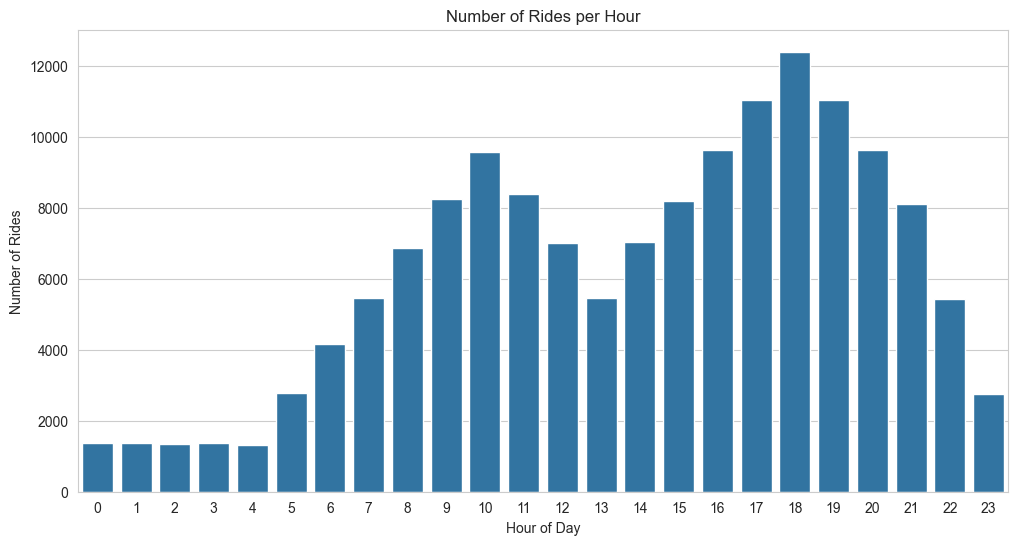

In [19]:
# Rides per Hour 

plt.figure(figsize=(12,6))
sns.countplot(x='Hour', data=df)
plt.title("Number of Rides per Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Rides")
plt.show()

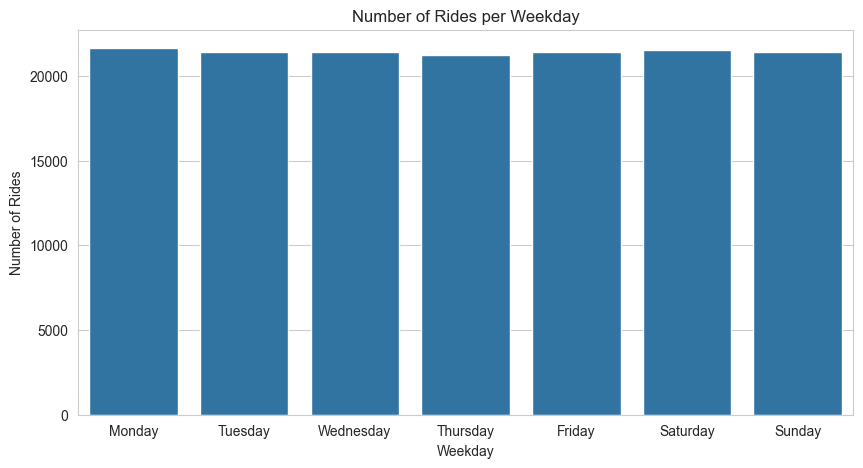

In [20]:
# Rides per Weekday

plt.figure(figsize=(10,5))
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sns.countplot(x='Weekday', data=df, order=order)
plt.title("Number of Rides per Weekday")
plt.ylabel("Number of Rides")
plt.show()


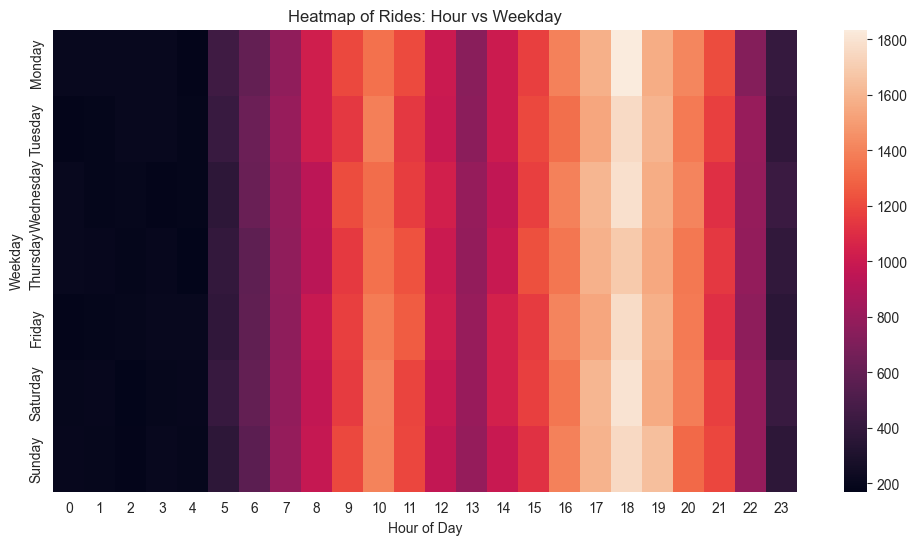

In [21]:
# Rides Heatmap: Weekday vs Hour

heatmap_data = df.groupby(['Weekday','Hour']).size().unstack()
heatmap_data = heatmap_data.reindex(order)

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data)
plt.title("Heatmap of Rides: Hour vs Weekday")
plt.ylabel("Weekday")
plt.xlabel("Hour of Day")
plt.show()



C:\Users\Hemant Sonbarse\AppData\Local\Temp\ipykernel_28968\3206629770.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_pickups.values, y=top_pickups.index, palette="cool")


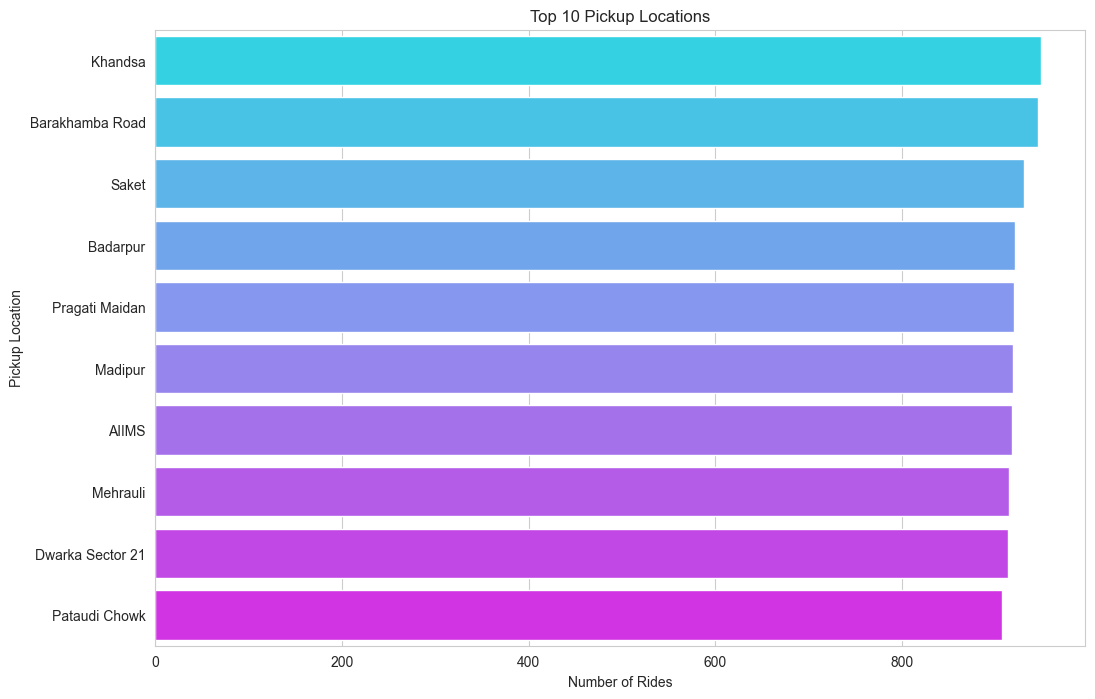

In [22]:
# Top 10 Pickup Locations

plt.figure(figsize=(12,8))
top_pickups = df['Pickup Location'].value_counts().head(10)
sns.barplot(x=top_pickups.values, y=top_pickups.index, palette="cool")
plt.title("Top 10 Pickup Locations")
plt.xlabel("Number of Rides")
plt.ylabel("Pickup Location")
plt.show()


C:\Users\Hemant Sonbarse\AppData\Local\Temp\ipykernel_28968\1310217519.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_drops.values, y=top_drops.index, palette='rocket')


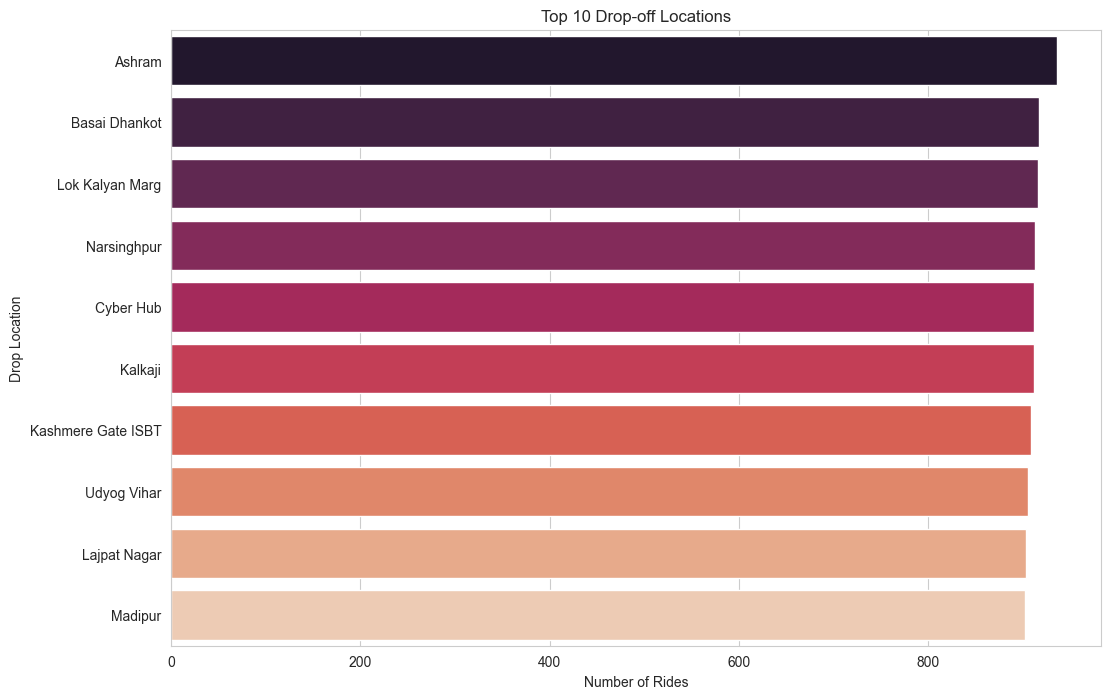

In [23]:
# Top 10 Drop-off Locations

plt.figure(figsize=(12,8))
top_drops = df['Drop Location'].value_counts().head(10)
sns.barplot(x=top_drops.values, y=top_drops.index, palette='rocket')
plt.title("Top 10 Drop-off Locations")
plt.xlabel("Number of Rides")
plt.show()

#### Vehicle Type Analysis

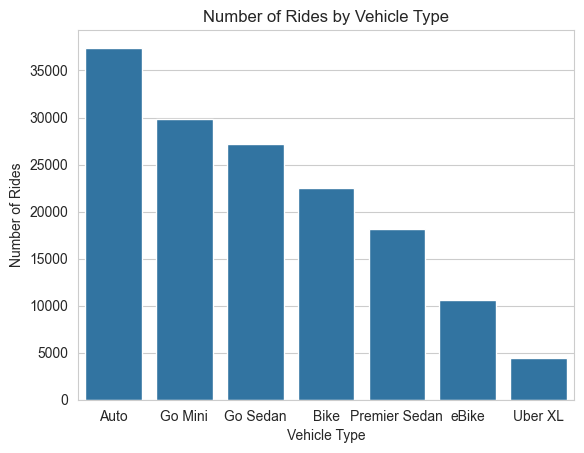

In [24]:
# Distribution of rides by vehicle type
plt.Figure(figsize=(10,5))
sns.countplot(x='Vehicle Type', data=df, order=df['Vehicle Type'].value_counts().index)
plt.title("Number of Rides by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Number of Rides")
plt.show()

In [25]:
# Average ride distance by Vehicle Type

Avg_Ride_Distance = df.groupby("Vehicle Type")["Ride Distance"].mean()
print(Avg_Ride_Distance)


Vehicle Type
Auto             24.615996
Bike             24.649546
Go Mini          24.612090
Go Sedan         24.609325
Premier Sedan    24.598956
Uber XL          24.402893
eBike            24.990415
Name: Ride Distance, dtype: float64


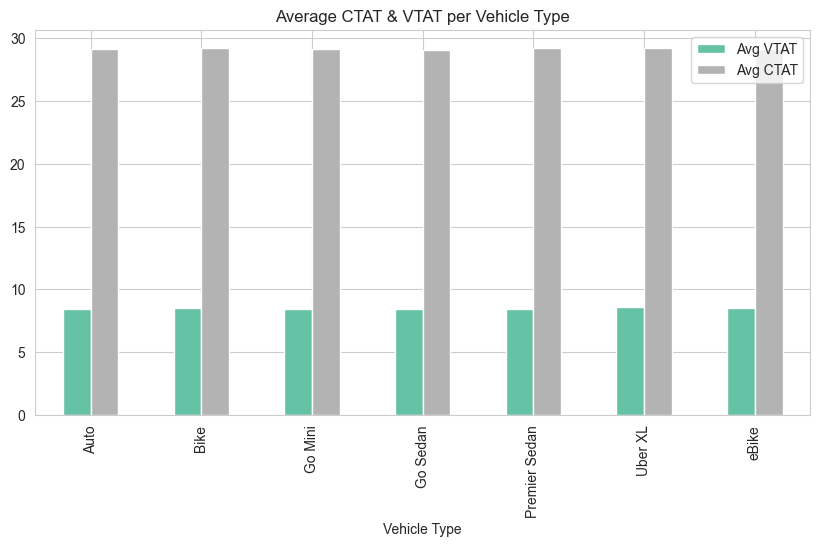

In [26]:
# Average Wait Time

Average_Wait_Time = df.groupby('Vehicle Type')[['Avg VTAT', 'Avg CTAT']].mean()

Average_Wait_Time.plot(kind='bar', figsize=(10,5), colormap="Set2")
plt.title("Average CTAT & VTAT per Vehicle Type")
plt.show()

#### Cancellation & Incompletion  Analysis

In [27]:
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Customer Rating,Payment Method,is_Customer_Cancelled,is_Driver_Cancelled,is_incomplete,DateTime,Hour,Weekday,Ride Duration (min),fare_per_km
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,False,False,False,2024-03-23 12:29:38,12,Saturday,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,UPI,False,False,True,2024-11-29 18:01:39,18,Friday,14.0,41.361257
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,4.9,Debit Card,False,False,False,2024-08-23 08:56:10,8,Friday,25.8,46.170839
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,5.0,UPI,False,False,False,2024-10-21 17:17:25,17,Monday,28.5,12.228101
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,4.3,UPI,False,False,False,2024-09-16 22:08:00,22,Monday,19.6,15.287285


{'Customer Cancelled': np.int64(10500), 'Driver Cancelled': np.int64(27000)}


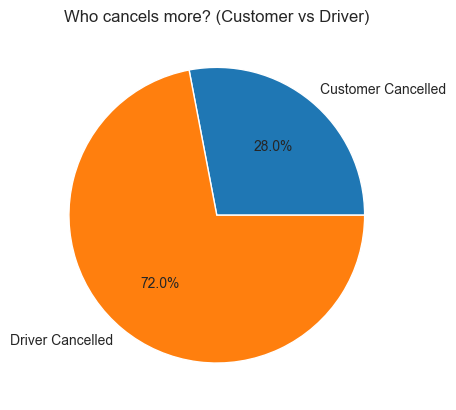

In [28]:
# Total cancellations by role (Customer vs Driver)

Cancellation_Counts = {
    'Customer Cancelled': df['is_Customer_Cancelled'].sum(),
    'Driver Cancelled': df['is_Driver_Cancelled'].sum()
}
print(Cancellation_Counts)

plt.pie(Cancellation_Counts.values(), labels=Cancellation_Counts.keys(), autopct='%1.1f%%')
plt.title("Who cancels more? (Customer vs Driver)")
plt.show()


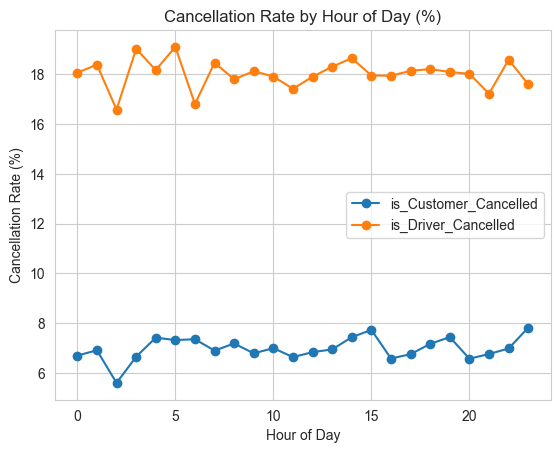

In [29]:
# Cancellation rate (%) by Hour

Cancellation_by_Hour = df.groupby('Hour')[['is_Customer_Cancelled','is_Driver_Cancelled']].mean()*100

Cancellation_by_Hour.plot(kind='line', marker='o')
plt.title("Cancellation Rate by Hour of Day (%)")
plt.ylabel("Cancellation Rate (%)")
plt.xlabel("Hour of Day")
plt.show()


<Figure size 1000x500 with 0 Axes>

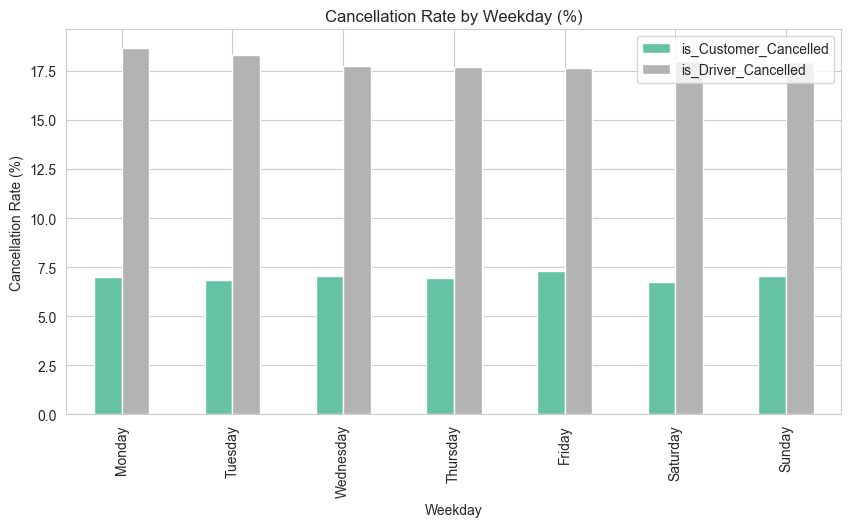

In [30]:
# Cancellation rate (%) by Weekday
cancellation_by_weekday = df.groupby('Weekday')[['is_Customer_Cancelled','is_Driver_Cancelled']].mean()*100
cancellation_by_weekday = cancellation_by_weekday.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

plt.figure(figsize=(10,5))
cancellation_by_weekday.plot(kind='bar', figsize=(10,5), colormap="Set2")
plt.title("Cancellation Rate by Weekday (%)")
plt.ylabel("Cancellation Rate (%)")
plt.show()

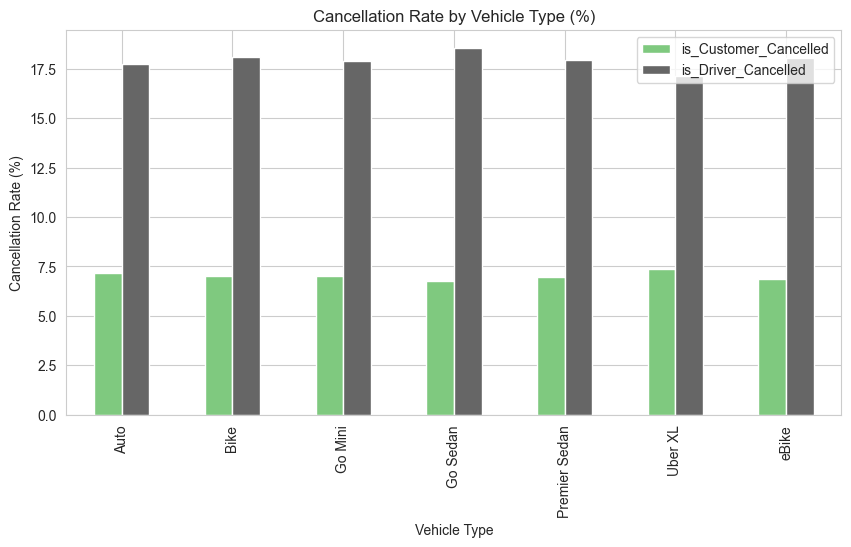

In [31]:
# Cancellation rate (%) by Vehicle Type

Cancellation_rate_by_Vehicle = df.groupby('Vehicle Type')[['is_Customer_Cancelled','is_Driver_Cancelled']].mean()*100

Cancellation_rate_by_Vehicle.plot(kind='bar', figsize=(10,5), colormap="Accent")
plt.title("Cancellation Rate by Vehicle Type (%)")
plt.ylabel("Cancellation Rate (%)")
plt.show()

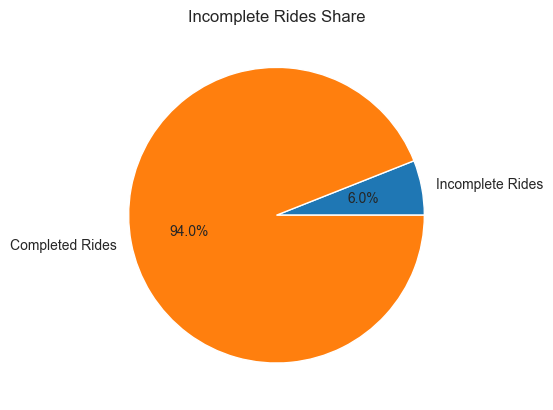

In [32]:
# Incomplete Rides Share

Incomplete_Share = df['is_incomplete'].mean()*100

plt.pie([Incomplete_Share, 100-Incomplete_Share], labels=["Incomplete Rides","Completed Rides"], autopct='%1.1f%%')
plt.title("Incomplete Rides Share")
plt.show()

C:\Users\Hemant Sonbarse\AppData\Local\Temp\ipykernel_28968\1611626763.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customer_reasons.values, y=top_customer_reasons.index, palette='cool')


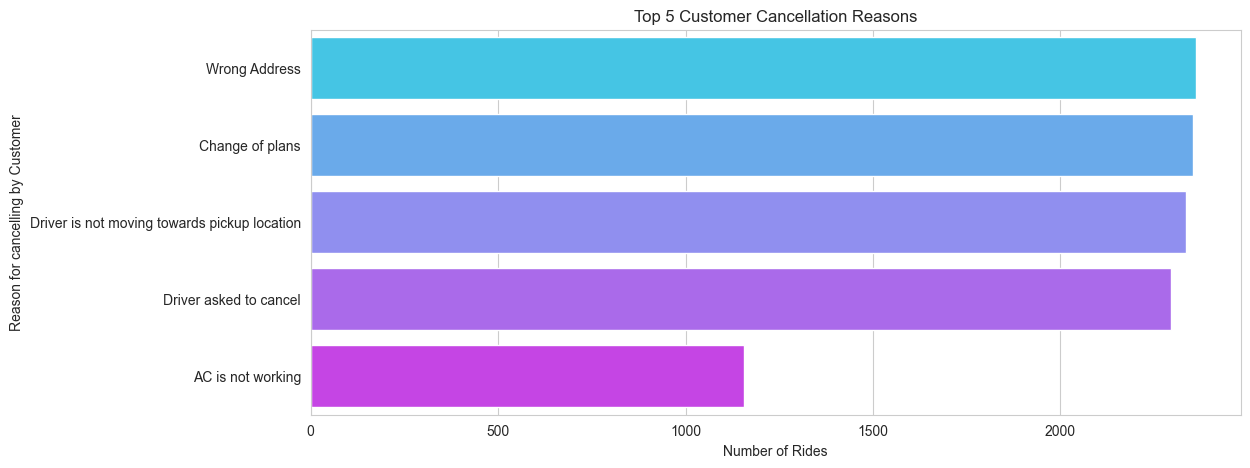

C:\Users\Hemant Sonbarse\AppData\Local\Temp\ipykernel_28968\1611626763.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_driver_reasons.values, y=top_driver_reasons.index, palette='rocket')


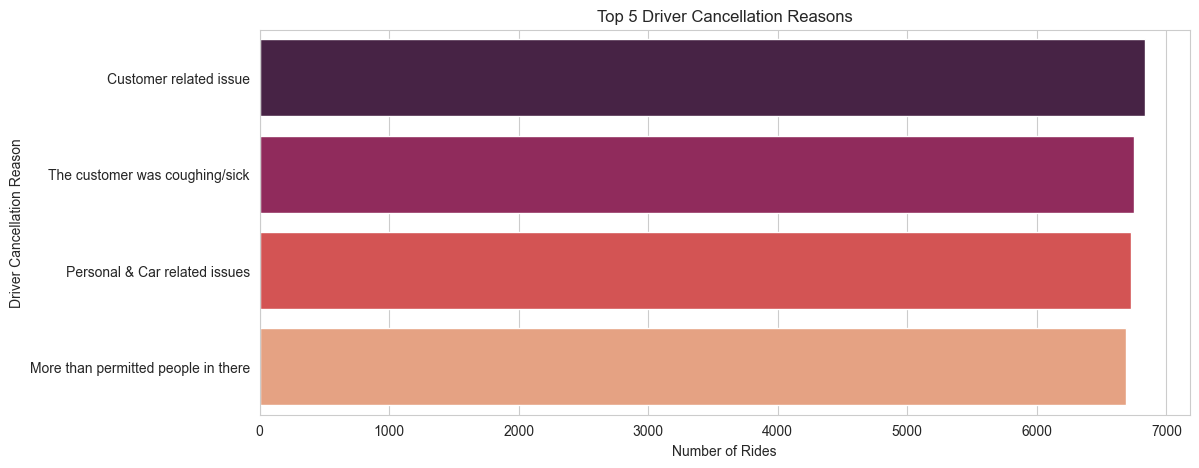

In [ ]:
# --- Top 5 Cancellation Reasons (Customer & Driver) ---
top_customer_reasons = df['Reason for cancelling by Customer'].value_counts().head(10)
top_driver_reasons = df['Driver Cancellation Reason'].value_counts().head(10)

plt.figure(figsize=(12,5))
sns.barplot(x=top_customer_reasons.values, y=top_customer_reasons.index, palette='cool')
plt.title("Top 5 Customer Cancellation Reasons")
plt.xlabel("Number of Rides")
plt.show()

plt.figure(figsize=(12,5))
sns.barplot(x=top_driver_reasons.values, y=top_driver_reasons.index, palette='rocket')
plt.title("Top 5 Driver Cancellation Reasons")
plt.xlabel("Number of Rides")
plt.show()

#### Operational Efficiency (VTAT & CTAT)

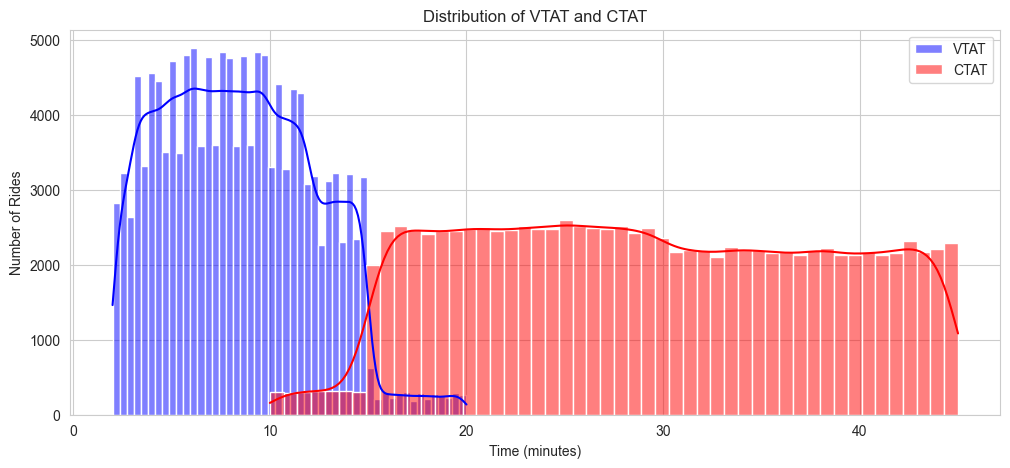

In [34]:
# Distribution of VTAT & CTAT

plt.figure(figsize=(12,5))
sns.histplot(df['Avg VTAT'], bins=50, kde=True, color='blue', label='VTAT')
sns.histplot(df['Avg CTAT'], bins=50, kde=True, color='red', label='CTAT')
plt.title("Distribution of VTAT and CTAT")
plt.xlabel("Time (minutes)")
plt.ylabel("Number of Rides")
plt.legend()
plt.show()

In [35]:

# Average VTAT & CTAT per Vehicle Type

avg_times = df.groupby('Vehicle Type')[['Avg VTAT','Avg CTAT']].mean()
print("Average VTAT & CTAT per Vehicle Type:\n", avg_times)



Average VTAT & CTAT per Vehicle Type:
                Avg VTAT   Avg CTAT
Vehicle Type                      
Auto           8.448299  29.142302
Bike           8.500043  29.199297
Go Mini        8.468101  29.159237
Go Sedan       8.401596  29.040217
Premier Sedan  8.438750  29.218741
Uber XL        8.575762  29.209852
eBike          8.478422  29.177204


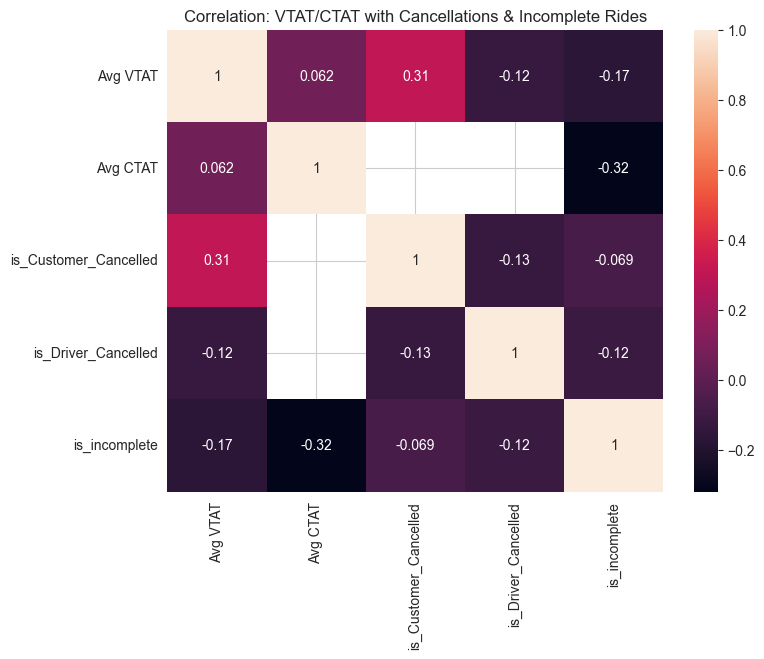

In [36]:
# Correlation with Cancellations & Incomplete Rides

corr_metrics = df[['Avg VTAT','Avg CTAT','is_Customer_Cancelled','is_Driver_Cancelled','is_incomplete']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_metrics, annot=True)
plt.title("Correlation: VTAT/CTAT with Cancellations & Incomplete Rides")
plt.show()


#### Service Quality (Ratings)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 29 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Date                               150000 non-null  object        
 1   Time                               150000 non-null  object        
 2   Booking ID                         150000 non-null  object        
 3   Booking Status                     150000 non-null  object        
 4   Customer ID                        150000 non-null  object        
 5   Vehicle Type                       150000 non-null  object        
 6   Pickup Location                    150000 non-null  object        
 7   Drop Location                      150000 non-null  object        
 8   Avg VTAT                           139500 non-null  float64       
 9   Avg CTAT                           102000 non-null  float64       
 10  Cancelled Rides by C

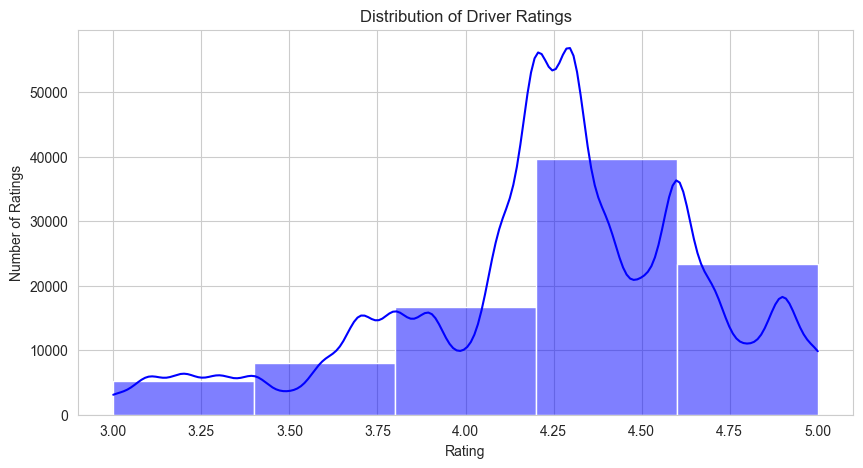

In [38]:
# Distribution of Driver Ratings

plt.figure(figsize=(10,5))
sns.histplot(df['Driver Ratings'], bins=5, kde=True, color='blue')
plt.title("Distribution of Driver Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Ratings")
plt.show()

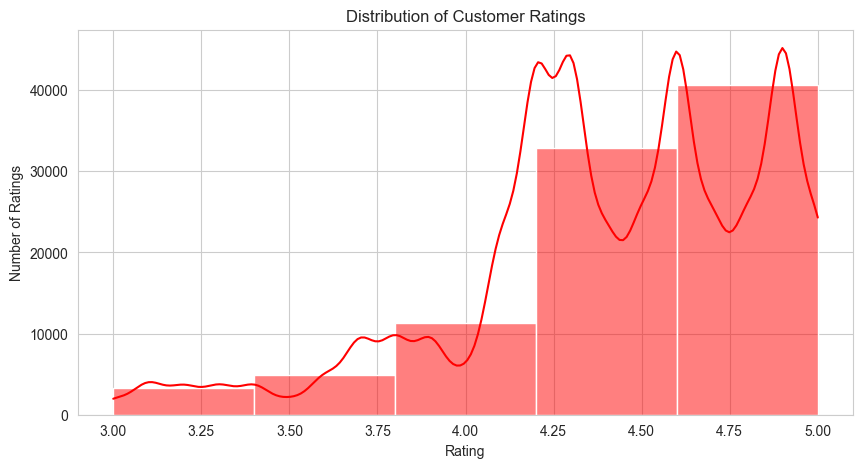

In [39]:
# Distribution of customer Ratings

plt.figure(figsize=(10,5))
sns.histplot(df['Customer Rating'], bins=5, kde=True, color='red')
plt.title("Distribution of Customer Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Ratings")
plt.show()

#### Revenue & Fare Analysis

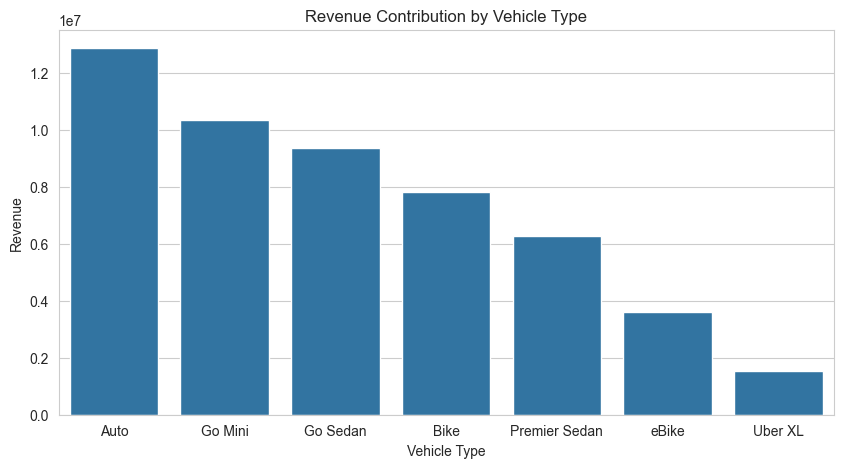

In [40]:
# Revenue contribution by vehicle type

revenue_by_vehicle = df.groupby('Vehicle Type')['Booking Value'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=revenue_by_vehicle.index, y=revenue_by_vehicle.values)
plt.title("Revenue Contribution by Vehicle Type")
plt.ylabel("Revenue")
plt.show()

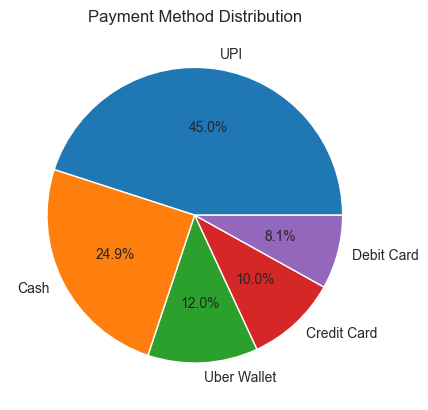

In [41]:
# Payment Method Distribution

payment_counts = df['Payment Method'].value_counts()
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%')
plt.title("Payment Method Distribution")
plt.show()

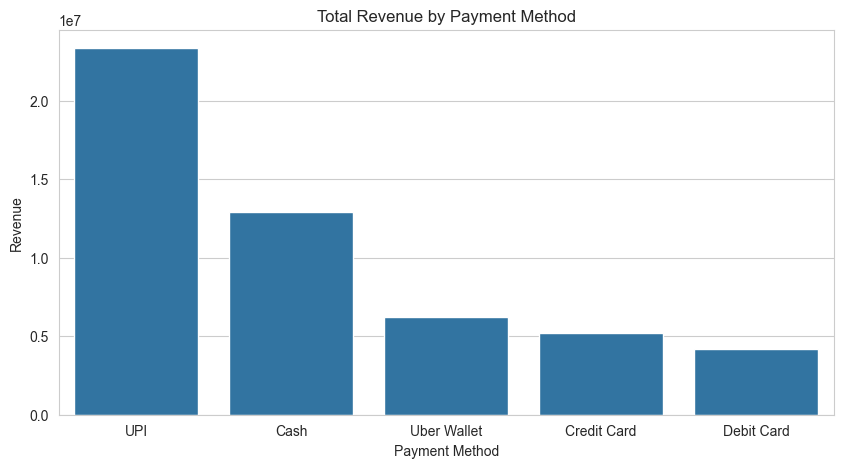

In [42]:
# Revenue by Payment Method

revenue_by_payment = df.groupby('Payment Method')['Booking Value'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=revenue_by_payment.index, y=revenue_by_payment.values)
plt.title("Total Revenue by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Revenue")
plt.show()


In [43]:
# Lost Revenue from Incomplete Rides

lost_revenue_incomplete = df[df['is_incomplete']==True]['Booking Value'].sum()
print("Lost revenue due to incomplete rides:", lost_revenue_incomplete)

Lost revenue due to incomplete rides: 4585609.0


#### Strategic Business Insights

Driver cancellations are 2.5× higher than customer cancellations, affecting reliability.

Avg. CTAT is 29 mins, showing scope to reduce customer wait time.

Sedans generate the most revenue; incomplete rides caused ~₹4.6M revenue loss.